<h2> Logistic Regression Project </h2>

<span>In this project we will be working with a  advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad
</span>

<h3>Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


<h2 style="color:'black'">Lets plot some of the features to get basic relation between them</h2>

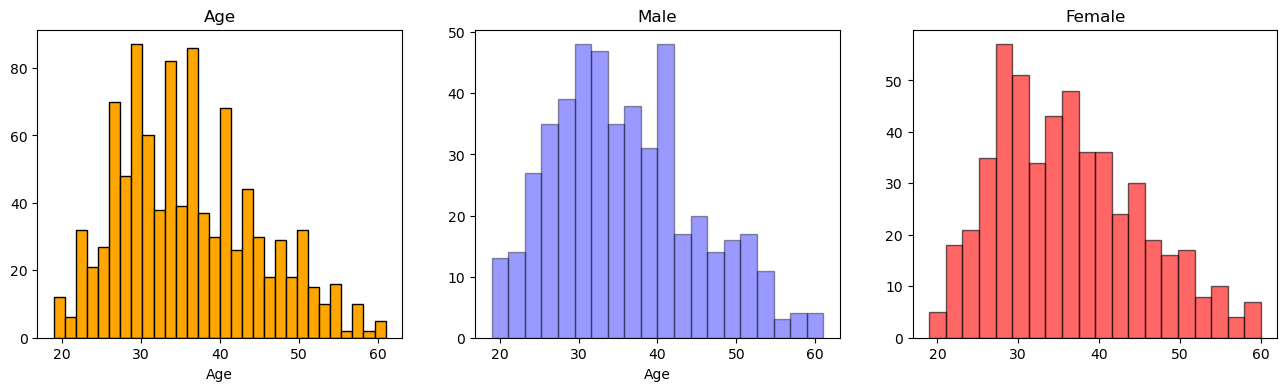

In [5]:
fig,ax=plt.subplots(1,3,figsize=(16,4))
ax[0].hist(df['Age'],bins=30,color='orange',edgecolor='k')
ax[0].set_title('Age')
ax[0].set_xlabel('Age')
ax[1].hist(df[df['Male']==1]['Age'],bins=20,color='blue',edgecolor='k',alpha=0.4)
ax[1].set_title('Male')
ax[1].set_xlabel('Age')
ax[2].hist(df[df['Male']==0]['Age'],bins=20,color='red',edgecolor='k',alpha=0.6)
ax[2].set_title('Female')
ax[1].set_xlabel('Age')
plt.show()


<h6 style="color:#006bb3; lineheight:1.5" >
 We can clearly see that Age group of 28-35 are high in using the internet,<br>

 Males of age between 25-30 and 40-42 are quiet good in number 
 
 Females of age between 25-30 are high in number<br>
</h6>

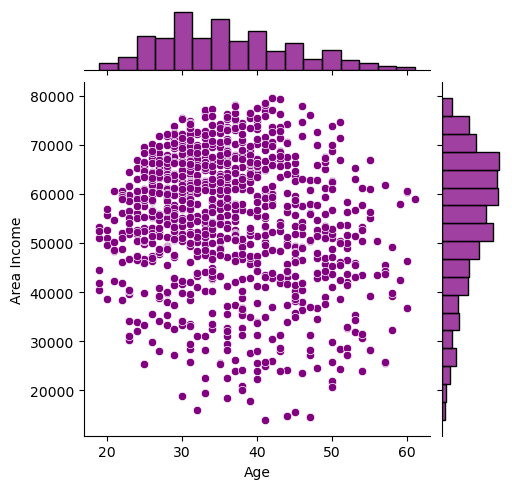

In [6]:
sns.jointplot(data=df,x='Age',y='Area Income',height=5,color='purple')

<h6 style="color:#006bb3">We can clearly see that people with salary 50000-70000 of age 25-35 are high in number </h6>



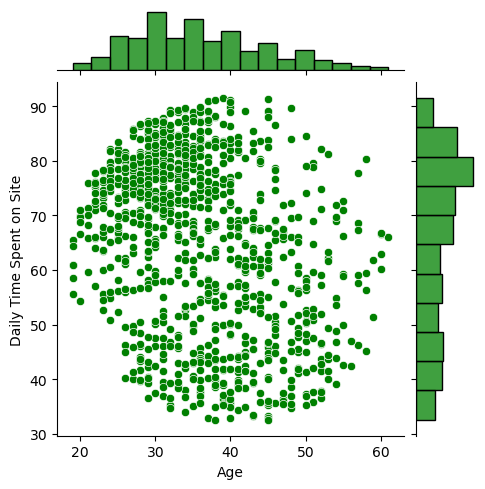

In [7]:
sns.jointplot(data=df,x='Age',y='Daily Time Spent on Site',color='green',height=5)

<h6 style="color:#006bb3">Age of 25-35 are highest user of the Website.observed from the Joint plot</h6>


<br>


<h2 style="color:'black'">Pair Plot</h2>

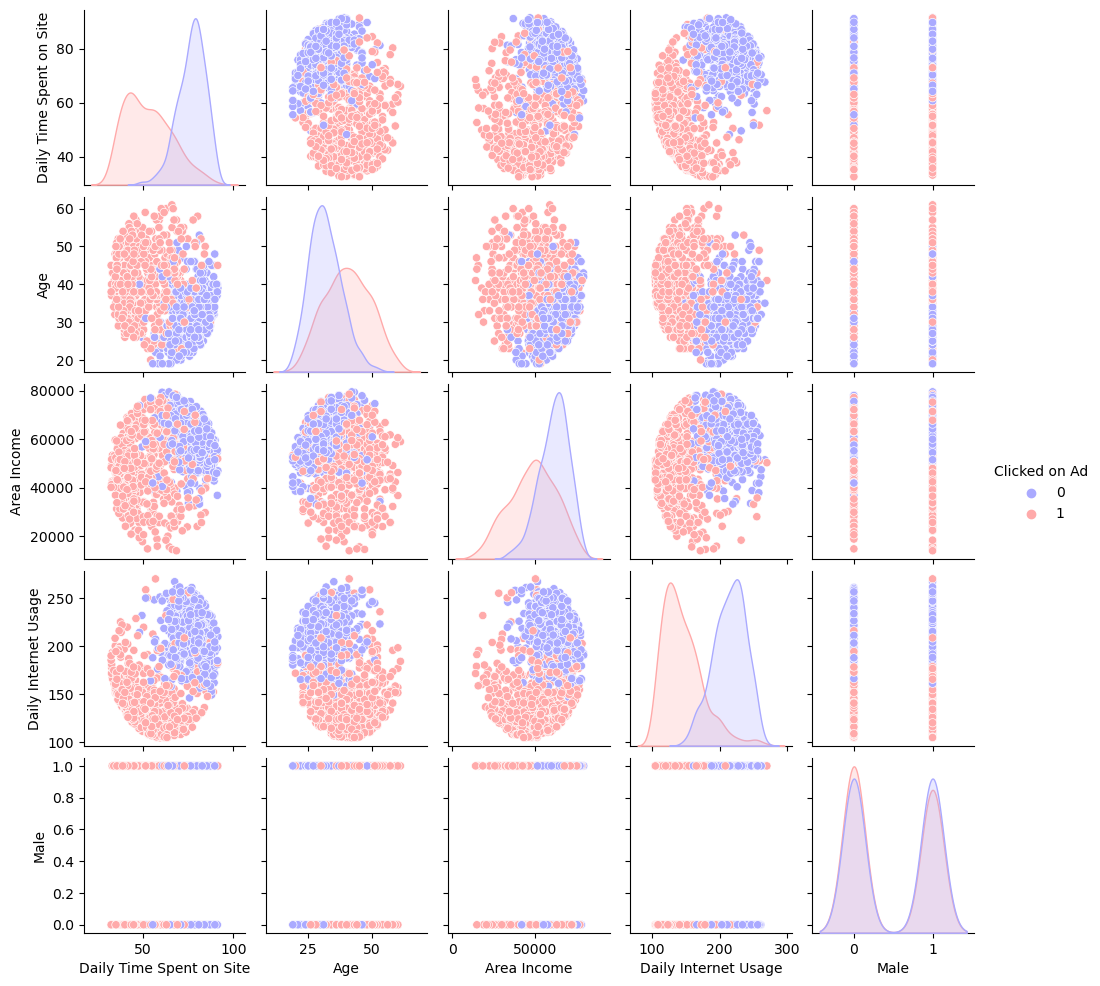

In [8]:
sns.pairplot(df,palette='bwr',hue='Clicked on Ad',height=2)

## Lets Remove some of the columns in the Data Set that are not useful for our analysis

In [9]:
df.drop(['Ad Topic Line','City','Country','Timestamp'],inplace=True,axis=1)

In [10]:
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0


In [11]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'],
      dtype='object')

<h6 style="color:#006bb3">
Columns Daily Time Spent on Site,Age,Area Income,Daily Internet Usage seems to take large values, this may effect the parameters very abdruptly<br>

So Feature Scaling is a better choice

</h6>



<br>


<br>

<br>

In [12]:
X=df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
y=df['Clicked on Ad']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train.shape

(670, 5)

# Feature Scaling

In [16]:
def feature_scale(col,df):
    mean_his=np.zeros(df.shape[1]-1)
    std_his=np.zeros(df.shape[1]-1)
    j=0
    for i in col:
        mean=df[i].mean()
        std=df[i].std()
        mean_his[j]=mean
        std_his[j]=std
        print(std)
        df[i]=df[i]-mean
        df[i]=df[i]/std
        j=j+1
    return mean_his,std_his

In [17]:
#Here we are storing the scale factors  to scale the test_data and new data we need to work on

mean_his,std_his=feature_scale(['Daily Time Spent on Site','Age', 'Area Income',
       'Daily Internet Usage'],X_train)

15.977635350260542
9.01131779878232
13516.567147420594
43.76110185492074


In [18]:
#Data frame to numpy 2D dimensional
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

----------------------Intial parameters for prediction------------------------------------

In [19]:
w_in=[1,1,1,1,1]
b_in=0


<h2 style="color:black"> Implementation of Logistic Regression without using Scikit Learn Libraries</h2>

In [20]:
#Sigmoid calculation
def sigmoid(z):
    f=1/(1+np.exp(-z))
    return f    

In [21]:
#Cost for W,b parameters

def compute_cost(X,y,w,b):
    #no.of rows and Columns
    m,n=X.shape
    cost=0
    for i in range(m):
        z=np.dot(X[i],w)+b
        f=sigmoid(z)
        loss=-y[i]*np.log(f)-(1-y[i])*np.log(1-f)
        cost=cost+loss
        
    cost=cost/m
    return cost

In [22]:
#intial Cost

c=compute_cost(X_train,y_train,w_in,b_in)
print("intial_Cost:"+str(c))

intial_Cost:1.9695686812835604


In [23]:
#Computation of dj_dw,dj_db

def compute_gradient(X,y,w,b):
    #the no.of rows and Columns
    m,n=X.shape
    dj_dw=np.zeros(n)
    dj_db=0.
    
    #X[i][j] refers to jth feature of ith training example
    for j in range(n):
        for i in range(m):
            z=np.dot(X[i],w)+b
            f=sigmoid(z)
            dj_dw[j]=dj_dw[j]+(f-y[i])*X[i][j]
        dj_dw[j]=dj_dw[j]/m
    
    for i in range(m):
        z=np.dot(X[i],w)+b
        f=sigmoid(z)
        dj_db=dj_db+(f-y[i])
    dj_db=dj_db/m
    
    return dj_dw,dj_db
        

In [24]:
dj_dw,dj_db=compute_gradient(X_train,y_train,w_in,b_in)
print("dj_dw :",dj_dw.tolist())
print("dj_db :",dj_db)

dj_dw : [0.6066633714225365, -0.23861793924384755, 0.48357412737904026, 0.6490484085270464, 0.0707184357542981]
dj_db : 0.07921792724999804


In [25]:
#Gradient descent Algorithm

def compute_gradient_descent(X,y,w,b,itr,alpha):
    m,n=X.shape
    dj_dw=np.zeros(n)
    dj_db=0.
    history={'itr':[],'cost_itr':[]}
    
    
    for i in range(itr):        
        if i<999 and i%100==0:
            cost=compute_cost(X,y,w,b)
            history['itr'].append(i)
            history['cost_itr'].append(cost)
            print("Iteration:"+str(i)+"    cost:"+str(cost))
            
                
        if (i%1000==0 or i==1999) and i>=1000:
            cost=compute_cost(X,y,w,b)
            history['itr'].append(i)
            history['cost_itr'].append(cost)
            print("Iteration:"+str(i)+"    cost:"+str(cost))
        
        dj_dw,dj_db=compute_gradient(X,y,w,b)
        w=w-dj_dw
        b=b-dj_db
                
        
    return w,b,history



In [26]:
#gradient descent implementation

w,b,history=compute_gradient_descent(X_train,y_train,w_in,b_in,2000,0.3)

Iteration:0    cost:1.9695686812835604
Iteration:100    cost:0.09037516579730724
Iteration:200    cost:0.08472356006391785
Iteration:300    cost:0.08260746215483357
Iteration:400    cost:0.08160271612262802
Iteration:500    cost:0.08107825681472551
Iteration:600    cost:0.08078920492888324
Iteration:700    cost:0.08062397797166924
Iteration:800    cost:0.08052702370092753
Iteration:900    cost:0.08046901484476507
Iteration:1000    cost:0.08043379464872807
Iteration:1999    cost:0.08037681070133317


In [27]:
History=pd.DataFrame(history)

<Axes: xlabel='itr', ylabel='cost_itr'>

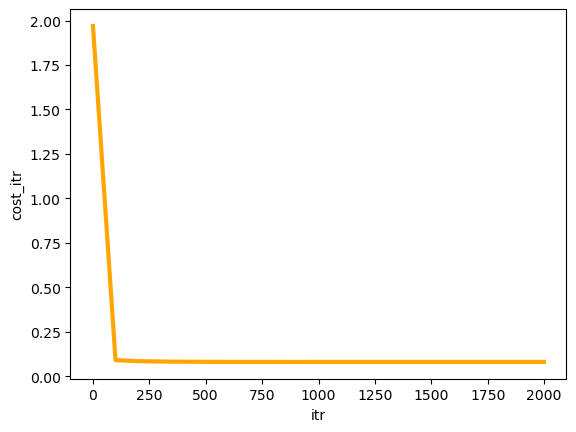

In [28]:
sns.lineplot(History,x='itr',y='cost_itr',color='orange',lw=3)

In [29]:
#final parameters
print("W :",w.tolist())
print("b :",b.tolist())

W : [-3.094552248377542, 1.5230914394224264, -2.044757444029194, -3.135088685522429, -0.8813504204129229]
b : 2.354361371253744


<h2>Training Error</h2>

In [30]:
train_err=compute_cost(X_train,y_train,w,b)
train_err

0.08037680802992181

<h2>Test Error</h2>

In [31]:
#only tranformation of data is done over here with train data scalers

X_test[:,:4]=((X_test[:,:4]-mean_his)/std_his)

In [32]:
#predictions
predict_without_lib=np.dot(X_test,w)+b

In [33]:
#test error
test_err=compute_cost(X_test,y_test,w,b)
test_err

0.11760454025070952

<h4>Train_error tells us the model is high bias free<br>

Test_error >~ Train_error<br>

There is no much difference in train and test error(high variance free)<br>

This shows the variance bias tradeoff is well versed</h4>

In [34]:
for i in range(predict_without_lib.shape[0]):
    if predict_without_lib[i]>=0.5:
        predict_without_lib[i]=1
    else:
        predict_without_lib[i]=0

In [35]:
tn=0 #true negatives
fn=0 #false negatives
tp=0 #true positives
fp=0 #false positives
for i in range(predict_without_lib.shape[0]):
    if y_test[i]==predict_without_lib[i]:
        if y_test[i]==0:
            tn=tn+1
        else:
            tp=tp+1
    else:
        if y_test[i]==1:
            fn=fn+1
        else:
            fp=fp+1
            

In [36]:
print("True Negatives: "+str(tn))
print("True Positives: "+str(tp))
print("False Negatives: "+str(fn))
print("False Positives: "+str(fp))

True Negatives: 160
True Positives: 160
False Negatives: 8
False Positives: 2


In [37]:
print("Accuracy",(tn+tp)/330)

Accuracy 0.9696969696969697


<h2>Model Accuracy: 97%</h2>

<br>

<br>

<br>

<br>

# Implementation of Logistic Regression Using Sklearn in-built libraries

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [40]:
predict_using_lib=logmodel.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,log_loss

<h3>Classification Report on Lib Logistic Model</h3>

In [42]:
print(classification_report(y_test,predict_using_lib))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       162
           1       0.99      0.96      0.97       168

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



<h3>Classification Report on without Lib Logistic Model</h3>

In [43]:
print(classification_report(y_test,predict_without_lib))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       162
           1       0.99      0.95      0.97       168

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



<br>

<h3 style="color:#2ab855">
Through this project I got a very good hands on experience in<br>

DataPreprocessing

Logistic Regression

Error_Analysis

Thank you for your valuable time
</h3>